<a href="https://colab.research.google.com/github/vananthi/zomoto_restarent_poc/blob/main/EDA_Zomoto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topics**

1.finding restaurants with most branches in Chennai

2.finding best restaurants with it's details

3.finding cheap and best restaurants

**Importing Important Libraries**




In [3]:
# import libries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Improve our domain Knowledge about Zomato**




**Lets Talks about Zomato and Familiar more about it:**


*  Zomato has Launched in 2010, its technology platform connects customers, restaurant partners and delivery partners, serving their multiple needs.

*  Customers use its platform to search and discover restaurants, read and write customer generated reviews and view and upload photos, order food delivery, book a table and make payments while dining-out at restaurants.

*  On the other hand, it provides restaurant partners with industry-specific marketing tools which enable them to engage and acquire customers to grow their business while also providing a reliable and efficient last mile delivery service. *Its team also operate a one-stop procurement solution, Hyperpure, which supplies high quality ingredients and kitchen products to restaurant partners. Zomato' team also provide our delivery partners with transparent and flexible earning opportunities.






**Zomato Restaurant contains the following variables:**


*  **Restaurant Id**:Unique id of every restaurant across various cities of the world
*  **Restaurant Name:**Name of the restaurant
* **City**:City in which restaurant is located
* **Address**: Address of the restaurant
*   **Locality**: Location in the city
*   **Locality Verbos**e: Detailed description of the locality
*   **Longitude**: Longitude coordinate of the restaurant's location
*    **Latitude**: Latitude coordinate of the restaurant's location
*   **Cuisines**: Cuisines offered by the restaurant
*  **Average Cost for two**: Cost for two people in different currencies       
*   **Has Table booking**: yes/no
*   **Has Online delivery**: yes/ no
*   **Is delivering**: yes/ no
*    **Switch to order menu**: yes/no
*   **Price range**: range of price of food
*   **Aggregate Rating**: Average rating out of 5
*   **Rating color**: depending upon the average rating color
*   **Rating text**: text on the basis of rating of rating
*  **Votes**: Number of ratings casted by people








In [1]:
from google.colab import files  # dataset on bording
upload=files.upload()

Saving Zomato Chennai Listing 2020.csv to Zomato Chennai Listing 2020.csv


In [4]:
df=pd.read_csv("Zomato Chennai Listing 2020.csv")

In [5]:
df.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


In [6]:
df.tail()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
12027,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Porur,['Sandwich'],Invalid,350.0,None,None,None,None,"['Breakfast', 'Delivery Only']"
12028,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Kolathur,['Sandwich'],Invalid,350.0,None,None,None,None,"['Breakfast', 'Delivery Only']"
12029,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Anna Nagar East,['Sandwich'],Invalid,350.0,None,None,None,None,"['Breakfast', 'Delivery Only']"
12030,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Ramapuram,['Sandwich'],Invalid,350.0,None,None,None,None,"['Breakfast', 'Delivery Only']"
12031,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Sholinganallur,['Sandwich'],Invalid,350.0,None,None,None,None,"['Breakfast', 'Delivery Only']"


In [7]:
df.columns

Index(['Zomato URL', 'Name of Restaurant', 'Address', 'Location', 'Cuisine',
       'Top Dishes', 'Price for 2', 'Dining Rating', 'Dining Rating Count',
       'Delivery Rating', 'Delivery Rating Count', 'Features'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          12032 non-null  object 
 8   Dining Rating Count    12032 non-null  object 
 9   Delivery Rating        12032 non-null  object 
 10  Delivery Rating Count  12032 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.1+ MB


In [9]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Price for 2,12032.0,397.61137,332.045938,40.0,200.0,300.0,450.0,5000.0


Lets go to find out the number of observations and columns of Zomato Restaurant Dataset

In [11]:
df.shape

(12032, 12)

**In Data Analysis we do:**


1.   Missing Values
2.   Explore about Numerical Valuables
3.   Explore about Categorical valuables
4.   Finding Relationship Between Features

In [12]:
df.isnull().sum()

Zomato URL               0
Name of Restaurant       0
Address                  0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

<Axes: >

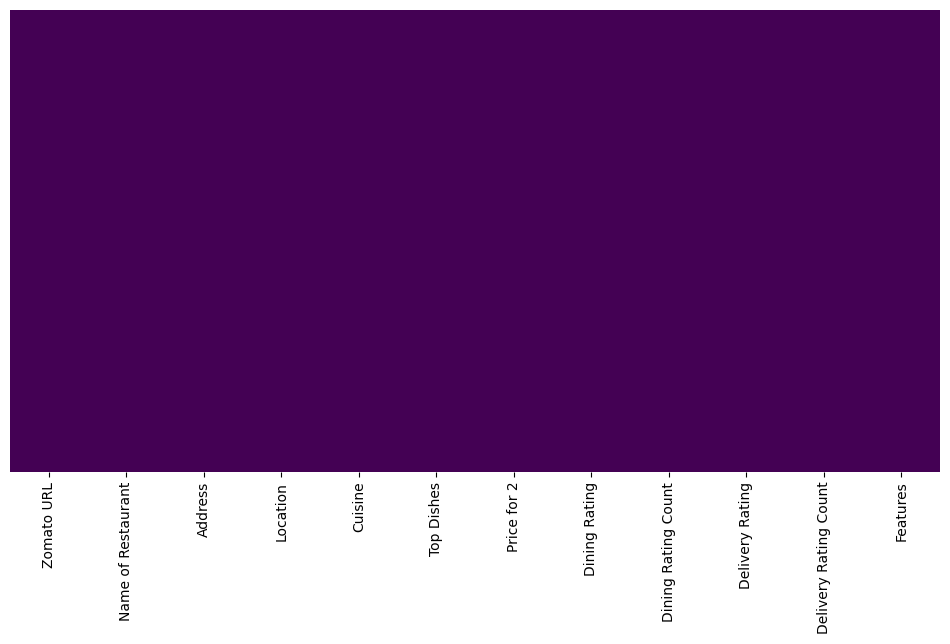

In [14]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.heatmap(df.isnull(), yticklabels =False, cbar=False, cmap= 'viridis')

In [ ]:
#WE WILL COUNT THE NUMBER OF TIMES A RESTAURANT'S NAME HAS BEEN REPEATED

df['count']=1
a=df.groupby(['Name of Restaurant']).count()['count']


In [ ]:
#THEN WE WILL SORT IN DESCENDING ORDER AND SLICE THE TOP 5
b=a.sort_values(ascending=False)
most_branches=b[0:6]

most_branches

Name of Restaurant
Amma Unavagam      78
CK's Bakery        71
Domino's Pizza     66
Lassi Shop         58
OYALO              51
Cafe Coffee Day    51
Name: count, dtype: int64

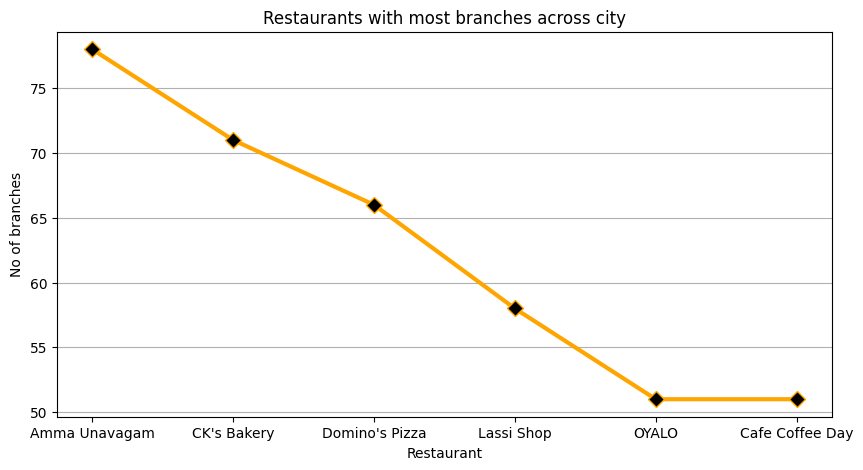

In [ ]:
#THIS IS A GRAPHICAL REPRESENTATION
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(most_branches,color='orange',linewidth=3,marker="D",markerfacecolor='black',markersize=8)
plt.xlabel('Restaurant')
plt.ylabel('No of branches')
plt.title('Restaurants with most branches across city')
plt.grid(axis='y')

IN ORDER TO FIND BEST RESTAURANT I ADDED BOTH DINING AND DELIVERY RATING AND RATED IT OUT OF 10

In [ ]:
# FIRST I REPLACED 'NONE' WITH 0 IN THE DF AND THEN CREATED A NEW COLUMN CALLED "total_rating"

df.loc[df['Dining Rating']=='None','Dining Rating']=0
df.loc[df['Delivery Rating']=='None','Delivery Rating']=0


df['total_rating']=df['Dining Rating'].astype(float)+df['Delivery Rating'].astype(float)


In [ ]:
#SORTING IN DESCENDING ORDER AND PICKING UP THE TOP 5
s=df['total_rating'].sort_values(ascending=False )
e=s[0:6]

In [ ]:
best_restaurants=df.iloc[e.index]['Name of Restaurant']

In [ ]:
#BEST RESTAURANTS(RATING WISE)

best_restaurants.reset_index()

,index,Name of Restaurant
0,155,The Sandwich Shop
1,62,Amadora Gourmet Ice Cream & Sorbet
2,163,Momo Sa-Khang by Kailash Kitchen
3,192,Kabab Corner
4,184,Gossip Fusion Bistro
5,57,Brownie Heaven


DETAILS OF TOP RATED RESTAURANTS

In [ ]:
#GETTING THE DETAILS OF TOP RATED RESTAURANTS WITH FOR LOOP

a=1
for i in e.index:
    print("")
    print("")
    print(a,')',df.iloc[i])
    a+=1



1 ) Zomato URL               https://www.zomato.com/chennai/the-sandwich-sh...
Name of Restaurant                                       The Sandwich Shop
Address                            1, Subba Street, West Mambalam, Chennai
Location                                                     West Mambalam
Cuisine                           ['Sandwich', ' Fast Food', ' Beverages']
Top Dishes               ['Mocktails', ' Fries', ' Pizza Sandwich', ' T...
Price for 2                                                          300.0
Dining Rating                                                          4.9
Dining Rating Count                                                    584
Delivery Rating                                                        4.4
Delivery Rating Count                                                  895
Features                 ['Home Delivery', 'Vegetarian Only', 'Bulk Ord...
count                                                                    1
total_rating       

CHEAP AND BEST RESTAURANTS

In [ ]:
#HERE I FILTERED THE RESTAURANTS BY TOP RATING AND CHEAP PRICE


k=df.groupby(['Name of Restaurant']).mean().sort_values('total_rating',ascending=False)
k

<ipython-input-25-f1506475acf1>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  k=df.groupby(['Name of Restaurant']).mean().sort_values('total_rating',ascending=False)


,Price for 2,count,total_rating
Name of Restaurant,,,
Momo Sa-Khang by Kailash Kitchen,350.0,1.0,9.3
Amadora Gourmet Ice Cream & Sorbet,500.0,1.0,9.3
Gossip Fusion Bistro,1500.0,1.0,9.2
Kabab Corner,450.0,1.0,9.2
Fusilli Reasons,400.0,1.0,9.1
...,...,...,...
Moras - Food Point,250.0,1.0,0.0
More Than Momos,225.0,1.0,0.0
Moshi Minutes,200.0,1.0,0.0


In [ ]:
#slicing timeee
price=k['Price for 2'][0:6]
rating=k['total_rating'][0:6]

#TOOK THE NAME
res_name=['Momo Sa-Khang by Kailash Kitchen','Fusilli Reasons','Kabab Corner','Amadora Gourmet Ice Cream & Sorbet','Soy Soi','Gossip Fusion Bistro']
price=price.sort_values()

BAR CHART

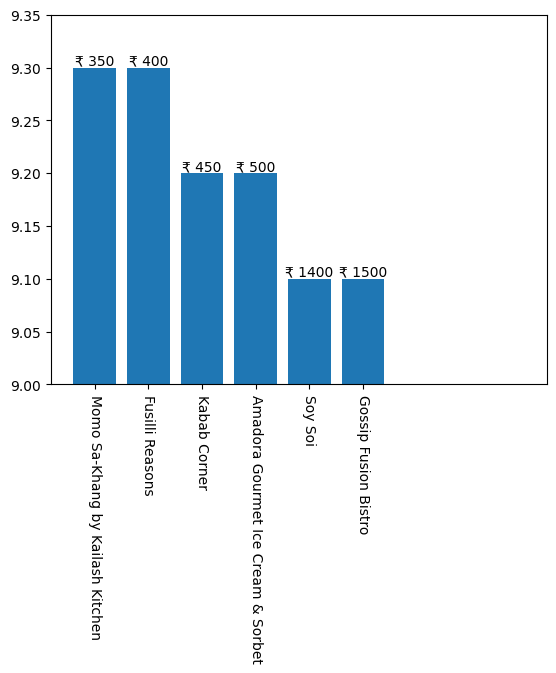

In [ ]:
plt.bar(res_name,rating)
plt.plot(range(9))
plt.ylim(9,9.35)
plt.text(0,rating[0],'₹ 350',ha='center',va='bottom')
plt.text(1,rating[1],'₹ 400',ha='center',va='bottom')
plt.text(2,rating[2],'₹ 450',ha='center',va='bottom')
plt.text(3,rating[3],'₹ 500',ha='center',va='bottom')
plt.text(4,rating[4],'₹ 1400',ha='center',va='bottom')
plt.text(5,rating[5],'₹ 1500',ha='center',va='bottom')
plt.xticks(rotation=270)
plt.show()
